#  Earnings, Gender, & Height

This assignment was completed by Zoe Martiniak and submitted as a Homework assignment for NYU course Python Coding for Public Policy.

The purpose of is to showcase an example of how statistics is used to drive analysis in the context of public policy and public data.

### Background on the data
The National Longitudinal Surveys (NLS) are a set of surveys designed to gather information at multiple points in time on the labor market activities and other significant life events of several groups of men and women. For more than 4 decades, NLS data have served as an important tool for economists, sociologists, and other researchers. <br>

### Datasets
- **National Longitudinal Survey of Youth 1997 (NLSY97)**
- **National Longitudinal Survey of Youth 1979 (NLSY79)**
https://www.nlsinfo.org/investigator/pages/login.jsp

The NLS has two major National Longitudinal Surveys of Youth (NLSY 1979 & 1997). Both collect data on employment, income, and personal characteristics from cohorts of people who were young at the time the surveys started. More specifically, 14 to 22 years old for NLSY79 and 12 to 17 years old for NLSY97. <br>

The latest datasets are from 2014 for NLSY79 and 2015 for NLSY97. Meaning that respondents would be in the 50s and their 30s, respectively.<br>



In [93]:
## Starting with just the NLSY97 dataset

nlsy97 = pd.read_csv('default.csv').drop('U0957000', axis=1)
nlsy97.rename(columns = {'R0000100':'rid', 'R0536300':'gender',
                        'T7635600': 'feet','T7635700':'inches',
                        'U0956900':'income'},inplace=True)

In [101]:
## Cleaning the dataset

nlsy97 = nlsy97[(nlsy97.gender>0)&(nlsy97.income>0)&(nlsy97.inches>=0)
               &(nlsy97.feet>=0)]
nlsy97['height'] = nlsy97.feet*12+nlsy97.inches
nlsy97 = nlsy97[nlsy97.height>30]
nlsy97.drop(['feet','inches'],axis=1,inplace=True)
nlsy97_f = nlsy97[nlsy97.gender==2]
nlsy97_m = nlsy97[nlsy97.gender==1]

Average female height (inches):  64.61589698046181
Average male height (inches):  70.54789430222957


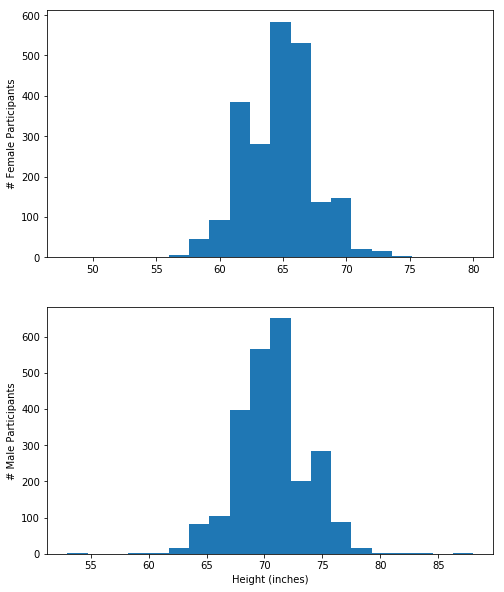

In [273]:
## Plotting a histogram of the height of female and male participants 
## & finding average for each gender

fig = plt.figure(figsize=(8,10))
ax1=fig.add_subplot(211)
ax1.hist(nlsy97_f['height'], bins=20)
ax1.set_ylabel('# Female Participants')

ax2=fig.add_subplot(212)
ax2.hist(nlsy97_m['height'], bins=20)
ax2.set_ylabel('# Male Participants')
ax2.set_xlabel('Height (inches)')

print('Average female height (inches): ',nlsy97_f.height.mean())
print('Average male height (inches): ',nlsy97_m.height.mean())


Female avg height (inches):  64.61589698046181
Male avg height (inches):  70.54789430222957


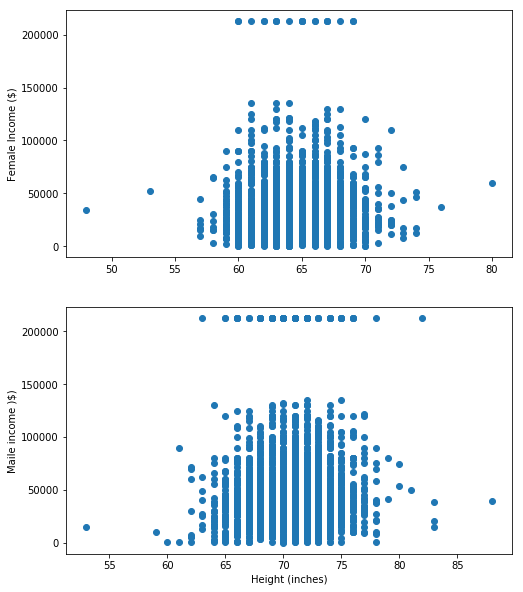

In [275]:
## Plotting a scatterplot of income vs. height for each gender

fig = plt.figure(figsize=(8,10))
ax1=fig.add_subplot(211)
ax1.scatter(nlsy97_f['height'],nlsy97_f['income'])
ax1.set_ylabel('Female Income ($)')

ax2=fig.add_subplot(212)
ax2.scatter(nlsy97_m['height'],nlsy97_m['income'])
ax2.set_ylabel('Maile income )$)')
ax2.set_xlabel('Height (inches)')

print('Female avg height (inches): ',nlsy97_f.height.mean())
print('Male avg height (inches): ',nlsy97_m.height.mean())


STATISTIC: Investigate if height indeed has impact on income. This analysis will be separated by gender.

NULL HYPOTHESIS: Height has no impact on income.

ALTERNATIVE HYPOTHESIS: Those who are tall (women over 65" and men over 70") have a statistically different income (higher or lower) when compared to those who are short at alpha=0.05. 

In [149]:
## Performing a standard two-tailed z-test on just the female population
## comparing the two income means (tall and short)

f_tall_income = nlsy97_f[nlsy97_f['height']>=65]['income'].mean()
f_tall_instd = nlsy97_f[nlsy97_f['height']>=65]['income'].std()
f_short_income = nlsy97_f[nlsy97_f['height']<65]['income'].mean()
f_short_instd = nlsy97_f[nlsy97_f['height']<65]['income'].std()


z_score = (f_tall_income - f_avg_income)/np.sqrt(
    nlsy97_f['income'].std()/len(nlsy97_f))

z_score_2 = (f_tall_income - f_short_income)/np.sqrt(
    (f_tall_instd/len(nlsy97_f[nlsy97_f['height']>=65]))+
(f_short_instd/len(nlsy97_f[nlsy97_f['height']<65])))

alpha = 0.05 
Z_value = 1.96
p_value = scipy.stats.norm.cdf(abs(z_score))*2

print('TESTING HYPOTHESIS FOR FEMALE POPULATION IN NLSY97 DATA')
print('Z value for alpha = 0.05 (two-tailed)', Z_value)
print('Z-score: ', z_score)
print('p-value: ', p_value)
if p_value < alpha:
    print('p < alpha, therefore we reject the null')
else:
    print('p > alpha, therefore we cannot reject the null.')



TESTING HYPOTHESIS FOR FEMALE POPULATION IN NLSY97 DATA
Z value for alpha = 0.05 (two-tailed) 1.96
Z-score:  380.77994646843416
p-value:  2.0
p > alpha, therefore we cannot reject the null.


In [150]:
## Performing a standard two-tailed z-test on just the male population
## comparing the two income means (tall and short)

m_avg_income = nlsy97_m['income'].mean()
m_tall_income = nlsy97_m[nlsy97_m['height']>70]['income'].mean()
m_tall_instd = nlsy97_m[nlsy97_m['height']>70]['income'].std()
m_short_income = nlsy97_m[nlsy97_m['height']<=70]['income'].mean()
m_short_instd = nlsy97_m[nlsy97_m['height']<=70]['income'].std()


z_score = (m_tall_income - m_avg_income)/np.sqrt(
    nlsy97_m['income'].std()/len(nlsy97_m))

z_score_2 = (m_tall_income - m_short_income)/np.sqrt(
    (m_tall_instd/len(nlsy97_m[nlsy97_m['height']>=65]))+
(m_short_instd/len(nlsy97_m[nlsy97_m['height']<65])))

alpha = 0.05 
Z_value = 1.96
p_value = scipy.stats.norm.cdf(abs(z_score_2))*2

print('TESTING HYPOTHESIS FOR MALE POPULATION IN NLSY97 DATA')
print('Z value for alpha = 0.05 (two-tailed)', Z_value)
print('Z-score: ', z_score_2)
print('p-value: ', p_value)
if p_value < alpha:
    print('p < alpha, therefore we reject the null')
else:
    print('p > alpha, therefore we cannot reject the null.')



TESTING HYPOTHESIS FOR MALE POPULATION IN NLSY97 DATA
Z value for alpha = 0.05 (two-tailed) 1.96
Z-score:  140.55427266105698
p-value:  2.0
p > alpha, therefore we cannot reject the null.


Turns out, statistically, there is no correlation between height and income, when you separate the dataset by gender. 

In [84]:
nlsy79 = pd.read_csv('NLSY79.csv')
nlsy79.rename(columns={'R0000100':'rid',
                       'T5597600':'gender','T4915800':'income',
                      'T5595900':'feet','T5596000':'inches'},inplace=True)
nlsy79.drop(['R0214800','R0214800','R0214700','T4916000','T4915900','R0173600'], axis=1,inplace=True)
nlsy79.describe()


,rid,income,feet,inches,gender
count,12686.000000,12686.000000,12686.000000,12686.000000,12686.000000
mean,6343.500000,22669.958695,0.515608,0.644254,-1.449157
std,3662.277092,49264.300900,5.056203,5.864772,3.267121
min,1.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,3172.250000,-5.000000,-5.000000,-5.000000,-5.000000
50%,6343.500000,0.000000,5.000000,0.000000,1.000000
75%,9514.750000,31000.000000,5.000000,6.000000,2.000000
max,12686.000000,370314.000000,6.000000,76.000000,2.000000


In [90]:
nlsy79 = nlsy79[(nlsy79.gender>0)&(nlsy79.income>0)&(nlsy79.inches>=0)
               &(nlsy79.feet>=0)]
nlsy79['height'] = nlsy79.feet*12+nlsy79.inches
nlsy79 = nlsy79[nlsy79.height < 100]
nlsy79.drop(['feet','inches'],axis=1,inplace=True)
nlsy79_f = nlsy79[nlsy79.gender==2]
nlsy79_m = nlsy79[nlsy79.gender==1]


Female avg height (inches):  64.24122996968384
Male avg height (inches):  70.18663793103448


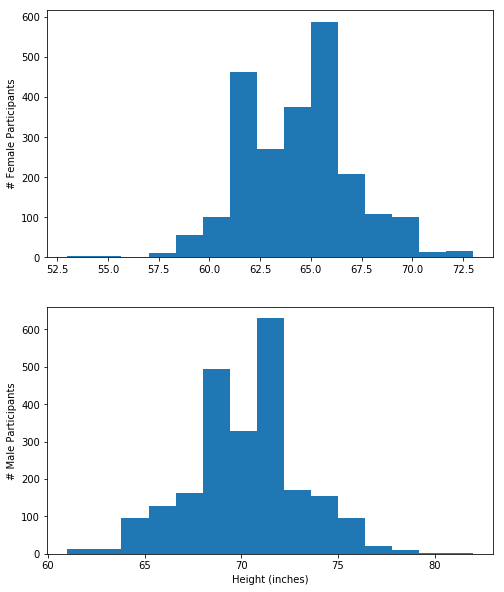

In [152]:
fig = plt.figure(figsize=(8,10))
ax1=fig.add_subplot(211)
ax1.hist(nlsy79_f['height'], bins=15)
ax1.set_ylabel('# Female Participants')

ax2=fig.add_subplot(212)
ax2.hist(nlsy79_m['height'], bins=15)
ax2.set_ylabel('# Male Participants')
ax2.set_xlabel('Height (inches)')


print('Female avg height (inches): ',nlsy79_f.height.mean())
print('Male avg height (inches): ',nlsy79_m.height.mean())

In [154]:
f_tall_income = nlsy79_f[nlsy79_f['height']>=65]['income'].mean()
f_tall_instd = nlsy79_f[nlsy79_f['height']>=65]['income'].std()
f_short_income = nlsy79_f[nlsy79_f['height']<65]['income'].mean()
f_short_instd = nlsy79_f[nlsy79_f['height']<65]['income'].std()


z_score = (f_tall_income - nlsy79_f['income'].mean())/np.sqrt(
    nlsy79_f['income'].std()/len(nlsy79_f))

z_score_2 = (f_tall_income - f_short_income)/np.sqrt(
    (f_tall_instd/len(nlsy79_f[nlsy79_f['height']>=65]))+
(f_short_instd/len(nlsy79_f[nlsy79_f['height']<65])))

alpha = 0.05 
Z_value = 1.96
p_value = scipy.stats.norm.cdf(abs(z_score_2))*2

print('TESTING HYPOTHESIS FOR FEMALE POPULATION IN NLSY97 DATA')
print('Z value for alpha = 0.05 (two-tailed)', Z_value)
print('Z-score: ', z_score_2)
print('p-value: ', p_value)
if p_value < alpha:
    print('p < alpha, therefore we reject the null')
else:
    print('p > alpha, therefore we cannot reject the null.')



TESTING HYPOTHESIS FOR FEMALE POPULATION IN NLSY97 DATA
Z value for alpha = 0.05 (two-tailed) 1.96
Z-score:  638.6366454753665
p-value:  2.0
p > alpha, therefore we cannot reject the null.


### Part 3: The Math of Gender, Sex & Earnings

1. Quartile ranges of both datasets

In [177]:
print('NLSY97 Income Quartiles ($)')
print(nlsy97.describe()['income'][['25%','50%','75%']])

print('\nNLSY79 Income Quartiles ($)')
print(nlsy79.describe()['income'][['25%','50%','75%']])

NLSY97 Income Quartiles ($)
25%    22000.0
50%    37000.0
75%    56000.0
Name: income, dtype: float64

NLSY79 Income Quartiles ($)
25%    23388.0
50%    42000.0
75%    70000.0
Name: income, dtype: float64


2. Correlation between height & earnings for both datasets

In [168]:
print('Corelation between income and height:')
print('for NLSY97:',nlsy97.corr()['income']['height'])
print('for only females in NLSY97:',nlsy97_f.corr()['income']['height'])
print('for only males in NLSY97:',nlsy97_m.corr()['income']['height'])
print('for NLSY79:',nlsy79.corr()['income']['height'])
print('for only females in NLSY79:',nlsy79_f.corr()['income']['height'])
print('for only males in NLSY79:',nlsy79_m.corr()['income']['height'])


Corelation between income and height:
for NLSY97: 0.1763182656038445
for only females in NLSY97: 0.04023548870508653
for only males in NLSY97: 0.07177920677317193
for NLSY79: 0.24871574631842924
for only females in NLSY79: 0.0820542771254827
for only males in NLSY79: 0.11172343228716836


This analysis shows that height is more correlated with income for the entire population, and is much less correlated when separated by gender. The higher correlation in the complete datasets is likely attributed to the gender wage gap. Men tend to make more than women, and men are on average 5 inches taller.  

Please see my regression below for discussion of the R-squared (r-value). 

3. Regression Analysis of both datasets

In [232]:
def regressionplot(DataFrame):
    slope, intercept, rvalue, pvalue, stderr = linregress(
        DataFrame['height'], DataFrame['income'])
    
    plt.scatter(DataFrame['height'],DataFrame['income'],alpha=0.4)
    plt.ylabel('Income')
    plt.xlabel('Height')
    plt.scatter(DataFrame['height'],DataFrame['height']*slope+intercept, 
               cmap='Reds')
    if DataFrame.gender.mean() == 1:
        gender = 'male'
    else:
        gender = 'female'
    print('The p-value for the ',gender,' regression fit is ',pvalue)
    print('The r-value for the ',gender,' regression fit is ',rvalue)
    print('& the r-squared is ',rvalue**2)

    


The p-value for the  male  regression fit is  0.0004073648766401377
The r-value for the  male  regression fit is  0.07177920677317129
& the r-squared is  0.005152254524985679
The p-value for the  female  regression fit is  0.05624947533047062
The r-value for the  female  regression fit is  0.040235488705086565
& the r-squared is  0.0016188945513371485


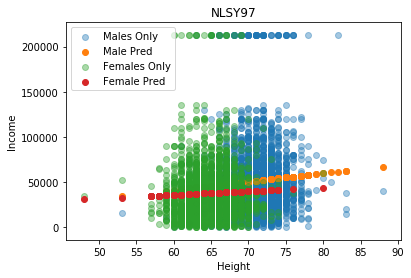

In [233]:
regressionplot(nlsy97_m)
regressionplot(nlsy97_f)
labels = ['Males Only','Male Pred','Females Only','Female Pred']
plt.title('NLSY97')
plt.legend(labels)

The p-value for the  male  regression fit is  6.840476327593207e-08
The r-value for the  male  regression fit is  0.1117234322871678
& the r-squared is  0.012482125322025368
The p-value for the  female  regression fit is  7.900473059715197e-05
The r-value for the  female  regression fit is  0.08205427712548292
& the r-squared is  0.0067329043945855505


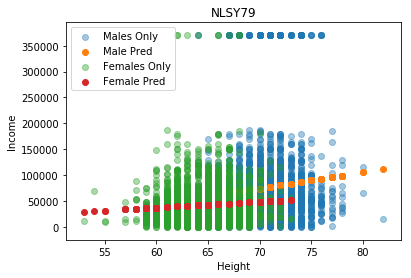

In [234]:
regressionplot(nlsy79_m)
regressionplot(nlsy79_f)
labels = ['Males Only','Male Pred','Females Only','Female Pred']
plt.title('NLSY79')
plt.legend(labels)

There does seem to be a general positive correlation beween height and income. Both regression fits have relatively low p-values and low r-values as well. This means that the trends illustrated by the regression fit are strong (low p-values), however the mean squared error is quite high (high r-squared). The NLSY79 data shows a stronger positive correlation between income and height, with much smaller p-values (in the order of e-8 and e-5 for males and females, respectively) and the R-squared values are closer to 1. The R-squared (and r-values) are low because the data does not follow a linear pattern, and represents more of a blob or cluster. 